参考资料：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

**导入基础包**

In [1]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [2]:
df = pd.read_csv('data_features_Order.csv') 

In [3]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Unclassified,Burkholderiales,...,Syntrophorhabdales,Bradymonadales,Solibacterales,Methylacidiphilales,UASB-TL25,Calditrichales,Reyranellales,Dongiales,Chthonomonadales,Candidatus Yanofskybacteria
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,8.265625,23.570312,...,0.000000,0.042969,0.027344,0.136719,0.058594,0.0,0.109375,0.046875,0.0,0.0
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,8.484375,18.730469,...,0.007812,0.054688,0.054688,0.152344,0.019531,0.0,0.093750,0.093750,0.0,0.0
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,8.308594,19.378906,...,0.000000,0.023438,0.031250,0.132812,0.015625,0.0,0.070312,0.058594,0.0,0.0
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,8.394531,22.824219,...,0.003906,0.035156,0.054688,0.179688,0.035156,0.0,0.109375,0.093750,0.0,0.0
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,8.585938,18.863281,...,0.000000,0.023438,0.039062,0.105469,0.011719,0.0,0.070312,0.082031,0.0,0.0


In [4]:
df.shape

(1186, 179)

In [5]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Unclassified', 'Burkholderiales',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=179)

In [10]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = df.columns.to_numpy()
targets = targets[8:]

**简单的EDA**

In [11]:
df.isnull().sum()

Unnamed: 0                       0
Sample ID                        0
Sampling month average         132
Sampling month                  23
SRTd                           342
                              ... 
Calditrichales                   0
Reyranellales                    0
Dongiales                        0
Chthonomonadales                 0
Candidatus Yanofskybacteria      0
Length: 179, dtype: int64

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [14]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

用这部均值填充NA数据

In [15]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [16]:
df.isnull().sum()

Unnamed: 0                     0
Sample ID                      0
Sampling month average         0
Sampling month                 0
SRTd                           0
                              ..
Calditrichales                 0
Reyranellales                  0
Dongiales                      0
Chthonomonadales               0
Candidatus Yanofskybacteria    0
Length: 179, dtype: int64

重定义训练和测试集

In [17]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**建模**

In [18]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型
from sklearn.linear_model import SGDRegressor
# XGBoost Classifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [20]:
neigh = KNeighborsRegressor(n_neighbors=20)

In [21]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', neigh)
])

训练模型

In [22]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.3026


利用训练好的模型做测试

In [23]:
y_preds = model.predict(X_test)

In [24]:
y_preds

array([[6.12578125e+00, 1.69771484e+01, 2.15800781e+01, ...,
        4.58593750e-01, 1.17187500e-03, 8.59375000e-03],
       [5.84023437e+00, 2.28533203e+01, 2.20296875e+01, ...,
        4.58984375e-02, 1.17187500e-03, 9.76562500e-04],
       [5.84023437e+00, 2.28533203e+01, 2.20296875e+01, ...,
        4.58984375e-02, 1.17187500e-03, 9.76562500e-04],
       ...,
       [3.06855469e+00, 2.84720703e+01, 1.90421875e+01, ...,
        6.03515625e-02, 7.81250000e-04, 1.95312500e-04],
       [3.06855469e+00, 2.84720703e+01, 1.90421875e+01, ...,
        6.03515625e-02, 7.81250000e-04, 1.95312500e-04],
       [3.06855469e+00, 2.84720703e+01, 1.90421875e+01, ...,
        6.03515625e-02, 7.81250000e-04, 1.95312500e-04]])

**结果可视化**

展示第一个ID的预测结果。

In [25]:
y_preds[0]

array([6.12578125e+00, 1.69771484e+01, 2.15800781e+01, 1.30214844e+00,
       6.90820312e-01, 3.53710937e-01, 4.82031250e-01, 3.41523437e+00,
       4.90039063e-01, 1.38164062e+00, 1.71621094e+00, 1.06640625e-01,
       4.86914063e-01, 3.09570312e-01, 3.48691406e+00, 4.26367188e-01,
       3.37714844e+00, 1.08593750e-01, 4.84375000e-01, 2.68925781e+00,
       1.14492188e+00, 7.75585938e-01, 3.56699219e+00, 7.19531250e-01,
       1.90703125e+00, 5.08398438e-01, 1.05273437e-01, 9.39453125e-02,
       1.69140625e-01, 3.40429688e-01, 2.77343750e-02, 7.04296875e-01,
       3.78906250e-02, 3.03906250e-01, 1.14648438e-01, 1.94531250e-01,
       3.47656250e-02, 6.25000000e-02, 5.03906250e-02, 1.71875000e-02,
       3.84375000e+00, 1.67968750e-02, 1.14257812e-01, 7.74609375e-01,
       2.58007812e-01, 5.75195312e-01, 1.07031250e-01, 3.10546875e-02,
       7.32421875e-02, 1.58398437e-01, 4.43554687e-01, 1.74414062e-01,
       8.88281250e-01, 1.78125000e-01, 1.59570313e-01, 1.60351562e-01,
      

In [26]:
y_test.iloc[0].tolist()

[8.75,
 21.375,
 8.75,
 1.48828125,
 0.84375,
 0.76953125,
 0.3984375,
 3.765625,
 0.36328125,
 1.3671875,
 2.640625,
 0.1171875,
 1.76953125,
 0.48046875,
 1.84375,
 0.3125,
 2.06640625,
 0.0625,
 0.34375,
 0.86328125,
 0.33984375,
 1.0546875,
 1.0390625,
 1.08984375,
 9.6953125,
 0.41015625,
 0.0078125,
 0.0625,
 0.07421875,
 0.28125,
 0.04296875,
 0.609375,
 0.02734375,
 0.58203125,
 0.1875,
 0.15234375,
 0.09765625,
 0.03125,
 0.0234375,
 0.0078125,
 1.6210937500000002,
 0.0078125,
 0.046875,
 1.03125,
 0.19921875,
 0.234375,
 0.078125,
 0.28125,
 0.0234375,
 0.0390625,
 2.94921875,
 0.2109375,
 0.14453125,
 0.4140625,
 0.26171875,
 0.1015625,
 0.4414062499999999,
 0.4921875,
 0.63671875,
 0.30859375,
 0.17578125,
 0.27734375,
 0.01953125,
 0.02734375,
 1.0234375,
 0.0390625,
 1.12890625,
 0.00390625,
 0.08984375,
 0.50390625,
 0.0703125,
 0.0234375,
 0.02734375,
 0.33984375,
 0.05078125,
 0.25,
 1.4453125,
 0.00390625,
 0.6171875,
 0.33203125,
 0.33203125,
 0.83984375,
 0.41796875

In [27]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [28]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Unclassified,6.125781,8.750000
Burkholderiales,16.977148,21.375000
Chitinophagales,21.580078,8.750000
Others,1.302148,1.488281
Rickettsiales,0.690820,0.843750
...,...,...
Calditrichales,0.188281,0.000000
Reyranellales,0.308008,0.125000
Dongiales,0.458594,0.031250


预测和实际结果的柱状图对比

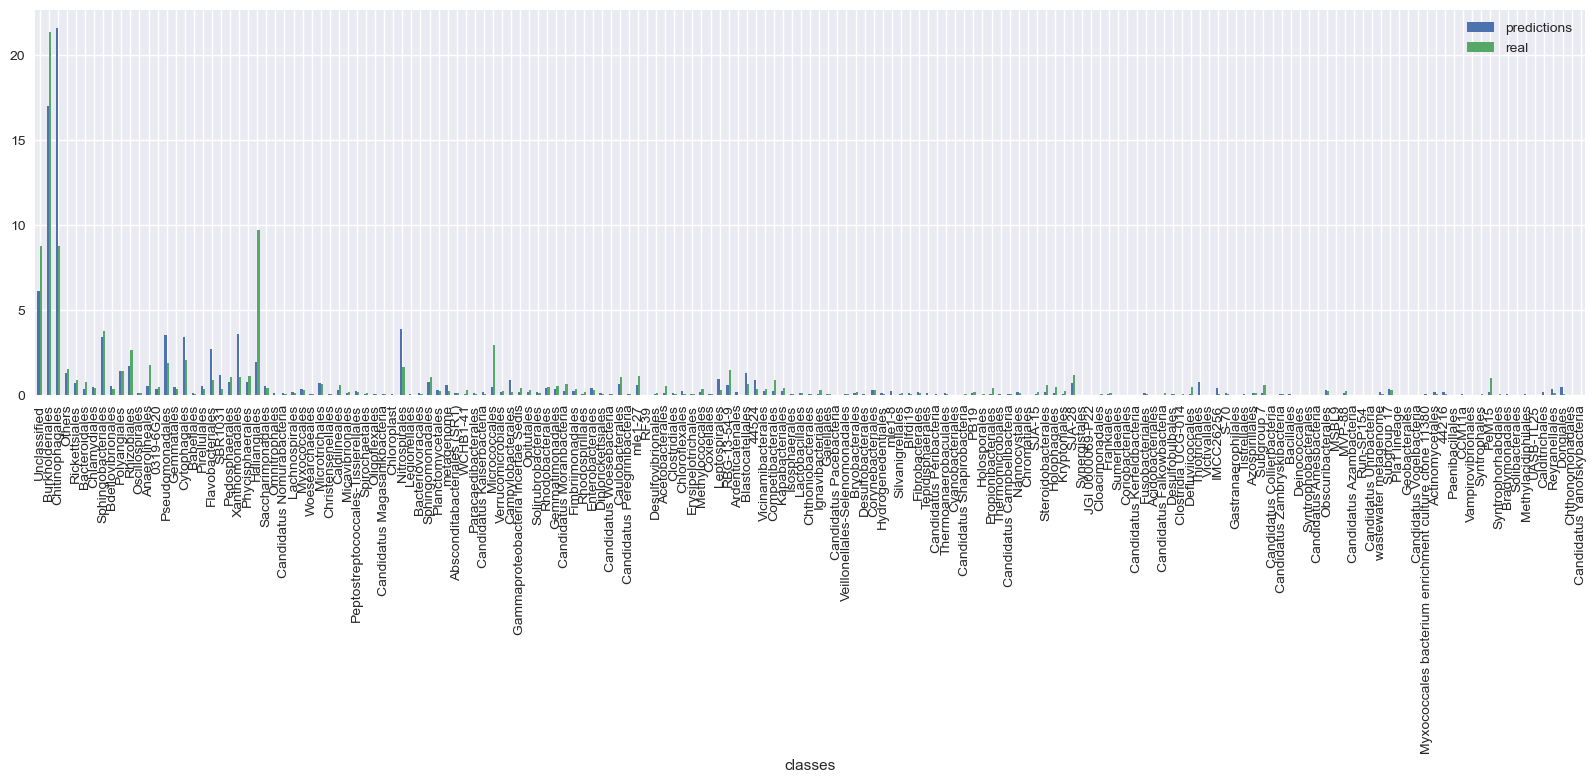

In [29]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

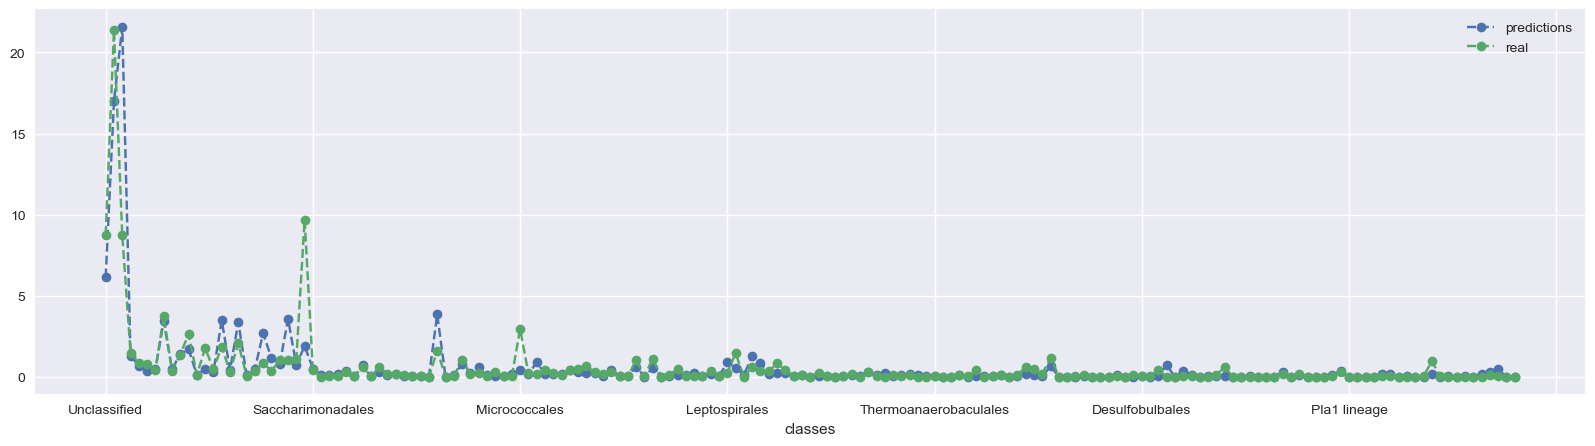

In [30]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [31]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.3026


In [32]:
from sklearn import metrics

训练集的MSE

In [33]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

0.934588228396502

测试集部分

In [34]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

3.097079228528613

In [35]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

1.759852047340518

In [36]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

0.3993036743206054

In [37]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

74392516909064.39

# 调参和优化

In [38]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [39]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [40]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', KNeighborsRegressor(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': KNeighborsRegressor(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__algorithm': 'auto',
 'regressor__leaf_size': 30,
 'regressor__metric': 'minkowski',
 'regressor__metric_params': None,
 'regressor__n_jobs': None,
 'regressor__n_neighbors': 20,
 'regressor__p': 2,
 'regressor__weights': 'uniform'}

In [41]:
# Perform Gridsearch and fit
param_grid = {"regressor__n_neighbors": [2, 4, 6, 8, 10,12,14,16,18,20,22,24,26,28,30]}

In [42]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        KNeighborsRegressor(n_neighbors=20))]),
             n_jobs=-1,
             param_grid={'regressor__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16,
                                                    18, 20, 22, 24, 26, 28,
                                                    30]},
             verbose=1)

In [43]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor(n_neighbors=4))])

In [44]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.6943


用最优化的参数，r方变大了。

In [45]:
y_preds1 = gs.predict(X_test)

In [46]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

3.6069426338082944

MSE也更大。不过这个调参优化是通过了分组验证，所以能更好的避免过拟合。缺点就是，用调参后的参数，无论测试还是验证结果都偏差。最后我们确认用之前的20作为参数。

作为对比，我们打印训练集的MSE，看看差距大不大。

In [47]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

0.4133001684210068